In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_curve, roc_auc_score
from sklearn.feature_selection import chi2,mutual_info_classif,SelectKBest

In [2]:
df = pd.read_csv('adult.csv')
df.sample(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
21471,47,Self-emp-inc,96798,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,80,United-States,>50K
26907,60,Private,239576,Masters,14,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,10,United-States,<=50K
257,38,Federal-gov,248919,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,2051,40,United-States,<=50K
6179,39,Private,34028,Bachelors,13,Divorced,Exec-managerial,Unmarried,White,Female,0,0,48,United-States,<=50K
9689,38,Local-gov,289430,HS-grad,9,Divorced,Protective-serv,Not-in-family,White,Male,0,0,56,United-States,<=50K


#Question 1:

Preprocess the given data

● Handle missing data if any

● Generate new features by combining existing features if required.


In [3]:
# Some columns were spotted with '?' as element. To replace them with NaN value and drop those columns
for column in df.columns:
    if '?' in list(df[column].unique()):
        print(f"Unique elements in {column} column are {df[column].unique()}")
        df[column].replace('?',np.nan,inplace=True)

Unique elements in workclass column are ['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']
Unique elements in occupation column are ['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-support'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
Unique elements in native.country column are ['United-States' '?' 'Mexico' 'Greece' 'Vietnam' 'China' 'Taiwan' 'India'
 'Philippines' 'Trinadad&Tobago' 'Canada' 'South' 'Holand-Netherlands'
 'Puerto-Rico' 'Poland' 'Iran' 'England' 'Germany' 'Italy' 'Japan' 'Hong'
 'Honduras' 'Cuba' 'Ireland' 'Cambodia' 'Peru' 'Nicaragua'
 'Dominican-Republic' 'Haiti' 'El-Salvador' 'Hungary' 'Columbia'
 'Guatemala' 'Jamaica' 'Ecuador' 'France' 'Yugoslavia' 'Scotland'
 'Portugal' 'Laos' 'Thailand' 'Outlying-US(Guam-USVI-etc)']


In [4]:
df.dropna(inplace=True)

In [5]:
df = df.apply(LabelEncoder().fit_transform)
df.sample(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
29492,7,2,5593,11,8,4,5,2,4,1,0,0,39,38,0
2733,7,2,8054,15,9,2,0,0,4,1,90,0,39,38,1
25259,30,4,13397,12,13,2,3,0,4,1,0,0,44,38,0
15325,3,2,3229,15,9,4,9,1,3,0,0,0,19,38,0
20282,22,4,12619,11,8,2,13,0,4,1,0,0,59,38,1


# Question 2:

Use the given dataset to perform data analysis and report various findings related to the
data. Investigate and find relationships between various attributes, how each feature is
distributed.

● Use Seaborn and matplotlib to investigate the data distribution and
relationship and present your findings.

● Use statistical methods learnt in the seminar to find useful attributes from
the data (cherry pick the important ones).

● Normalise the cherry picked features and use them for Question 3.


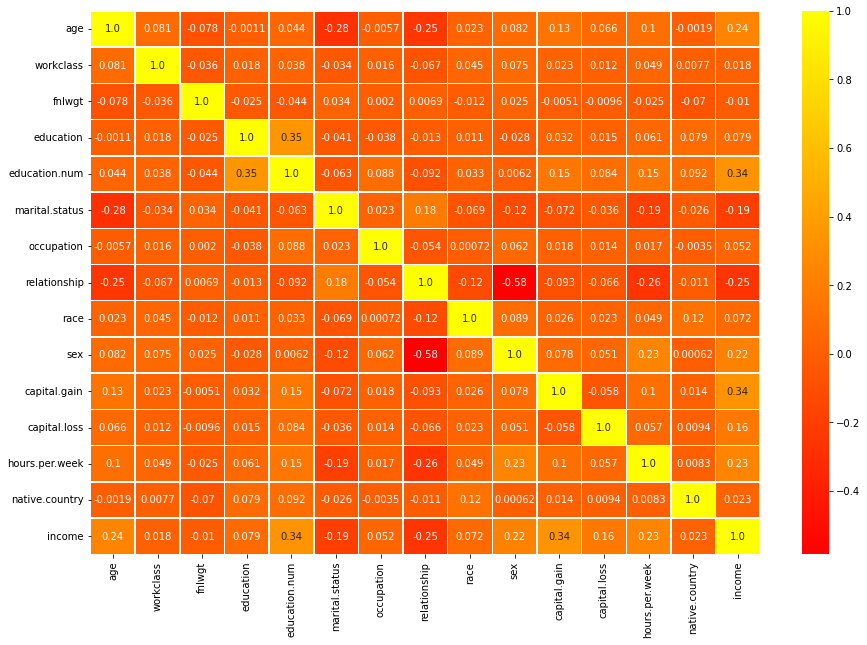

In [6]:
# Correlations between the feature columns
cm = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, linewidth = 0.5, cmap = 'autumn', fmt="0.2")
plt.show()

In [7]:
x= df.drop(['income'],axis=1)
y = df['income']
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.25)

In [8]:
best_features = SelectKBest(mutual_info_classif, k=6)
best_features.fit_transform(x_train, y_train)

array([[ 9, 12,  0,  3,  4,  0],
       [11,  8,  4,  7,  3,  0],
       [11,  8,  6,  7,  1,  0],
       ...,
       [ 9, 12,  4, 11,  1,  0],
       [ 9, 12,  4,  3,  1,  0],
       [11,  8,  4, 13,  1,  0]])

In [9]:
x_train = x_train.iloc[:,best_features.get_support()]
x_test = x_test.iloc[:,best_features.get_support()]

In [10]:
x_train = pd.DataFrame(MinMaxScaler().fit_transform(x_train),
                       columns = x_train.columns,
                       index = x_train.index)
x_test = pd.DataFrame(MinMaxScaler().fit_transform(x_test),
                       columns = x_test.columns,
                       index = x_test.index)

# Question 3:

a) Write a function that learns the parameters of a logistic regression function given
inputs

• X: An n × m numpy array of independent variable values

• Y : The n × 1 binary numpy array of output values

• k: the number of iterations (epochs)

• τ: the threshold on change in Cost function value from the previous to
current iteration

• λ: the learning rate for Gradient Descent


The function should implement the Gradient Descent algorithm as discussed in class
that initialises β (weights) with random values and then updates these values in each
interaction by moving in the the direction defined by the partial derivative of the
cost function with respect to each of the coefficients. The function should use only
one loop that ends after a number of iterations (k) or a threshold on the change in
cost function value (τ).


In [11]:
def gradient_descent(x, y, beta, learning_rate):
  gradient = np.dot(x.T, sigmoid(np.dot(beta, x.T)) - y)/len(y)
  beta -= learning_rate * gradient
  return beta

def SGDClassifier(x_train, y_train, x_test, y_test, betas, max_iters=2000, learning_rate = 0.5):
    cost = []
    acc = []
    f = []
    roc = []
    for iterate in range(max_iters):
        betas = gradient_descent(x_train, y_train, betas, learning_rate)
        y_pred = sigmoid(np.dot(x_train, betas.T))
        cost.append(log_loss(y_pred, y_train)/len(y_train))

        y_p = sigmoid(np.dot(x_test, betas.T))
        fpr, tpr, _ = roc_curve(y_test,y_p)
        roc.append([fpr,tpr])
        auc = roc_auc_score(y_test,y_p)
        y_p[y_p>0.5] = 1
        y_p[y_p<=0.5] = 0
        accuracy = accuracy_score(y_test, y_p)
        acc.append(accuracy)
        f.append(f1_score(y_test,y_p))

    cm = confusion_matrix(y_test,y_p)
    print(f"The confusion matrix is \n{cm}")
    return y_pred, y_p, betas, cost, acc, f, roc , auc

sigmoid = lambda z: 1/(1 + np.exp(-z))
log_loss = lambda y_bar, y: np.sum(-y*np.log(y_bar)-(1-y)*np.log(1-y_bar))/len(y_bar)

In [12]:
beta = np.random.random(x_train.shape[1])

In [13]:
train_y_pred, test_y_pred, theta, error, accuracy, f1score, roc, auc = SGDClassifier(x_train, y_train, x_test, y_test, beta)

The confusion matrix is 
[[5275  368]
 [1288  610]]


In [14]:
print(f'''
Estimated coefficients = {theta}
Accuracy = {np.round(accuracy[-1]*100, 2)}%
F1 score = {f1score[-1]}
Error = {error[-1]}
ROC AUC Score = {auc}
''')


Estimated coefficients = [-1.23250481  2.19903638 -2.67944613 -0.43235064 -2.26116049  3.15858893]
Accuracy = 78.04%
F1 score = 0.4242002781641169
Error = 2.01985791110445e-05
ROC AUC Score = 0.7834217706243661



# Question 4:

a) Compare the performance of the model for the selected features from Question 2
vs all the features to see what type of differences are there in performance.

b) Plot the performance curves of the model on various metrics like accuracy, f1-score,
AUC ROC using sklearn metrics.

c) Provide some insight into your model performance on some of the given terms with
proper explanation.
1. Variance (Type of variance model is showing)
2. Bias (Type of bias model is showing)
3. Overfitting and underfitting (Is the model overfitting or underfitting)

In [15]:
x= df.drop(['income'],axis=1)
y = df['income']
x_train_1 , x_test_1 , y_train_1 , y_test_1 = train_test_split(x,y,random_state=42,test_size=0.25)

In [16]:
x_train_1 = pd.DataFrame(MinMaxScaler().fit_transform(x_train_1),
                       columns = x_train_1.columns,
                       index = x_train_1.index)
x_test_1 = pd.DataFrame(MinMaxScaler().fit_transform(x_test_1),
                       columns = x_test_1.columns,
                       index = x_test_1.index)

In [17]:
beta_1 = np.random.random(x_train_1.shape[1])

In [18]:
train_y_pred_1, test_y_pred_1, theta_1, error_1 , accuracy_1, f1score_1, roc_1 , auc_1= SGDClassifier(x_train_1, y_train_1, x_test_1, y_test_1, beta_1)

The confusion matrix is 
[[5308  335]
 [1131  767]]


In [19]:
print(f'''
Estimated coefficients = {theta_1}
Accuracy = {np.round(accuracy_1[-1]*100, 2)}%
F1 score = {f1score_1[-1]}
Error = {error_1[-1]}
ROC AUC Score = {auc_1}
''')


Estimated coefficients = [ 1.34268623 -1.24685014 -0.34423041 -0.42238059  3.52154457 -1.99408594
 -0.1644234  -1.61250096 -0.77122121  0.3467925   3.24239882  2.47324265
  0.73258781 -1.92518133]
Accuracy = 80.56%
F1 score = 0.5113333333333333
Error = 1.862405626657759e-05
ROC AUC Score = 0.8239441537927479



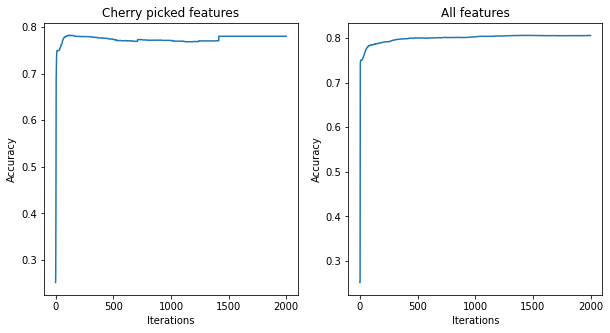

In [20]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(accuracy)
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.title("Cherry picked features")

plt.subplot(1,2,2)
plt.plot(accuracy_1)
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.title("All features")
plt.show()

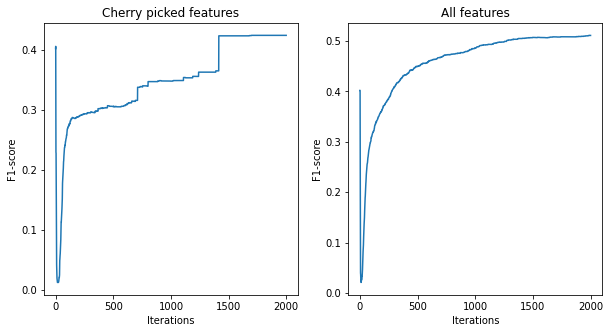

In [21]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(f1score)
plt.xlabel("Iterations")
plt.ylabel("F1-score")
plt.title("Cherry picked features")

plt.subplot(1,2,2)
plt.plot(f1score_1)
plt.xlabel("Iterations")
plt.ylabel("F1-score")
plt.title("All features")
plt.show()

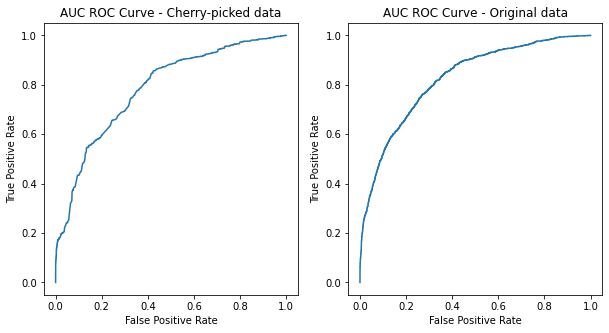

In [22]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(roc[-1][0], roc[-1][1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC ROC Curve - Cherry-picked data")

plt.subplot(1,2,2)
plt.plot(roc_1[-1][0], roc_1[-1][1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC ROC Curve - Original data")
plt.show()

In [23]:
variance = np.var(test_y_pred)
variance

0.1128712611168568

In [24]:
sse = np.mean((np.mean(test_y_pred)-y_test)**2)
sse

0.2032264552242815

In [25]:
bias = sse - variance
bias

0.09035519410742471

The model has low bias as well as low variance. So the model is a good fit.